In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"c:\Users\Samsung\OneDrive\Desktop\Diwali Sales Data.csv",encoding="unicode_escape")

In [3]:
data.drop(["Status","unnamed1"],axis =1,inplace=True)
print(data)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [4]:
print(data.dropna(inplace=True))
print(data.info())

None
<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB
None


In [5]:
data["Amount"] = data["Amount"].astype("int")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB
None


In [6]:
print(data[["Age","Orders","Amount"]].describe())

                Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610553
std       12.753866      1.114967   5222.355168
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000


In [7]:
print(data.columns)

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


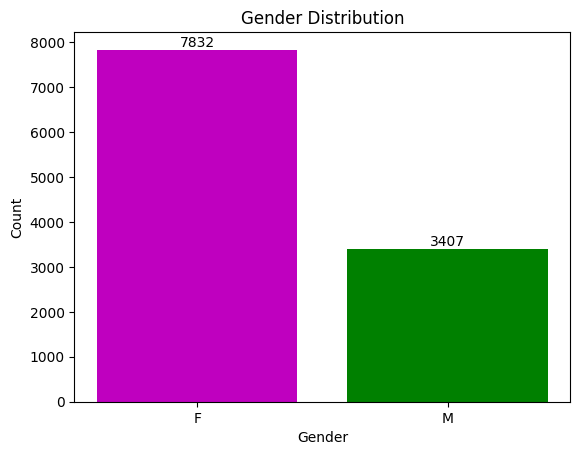

In [8]:



# Count occurrences by 'Gender'
gender_count = data['Gender'].value_counts()

# Create the bar plot
bars = plt.bar(gender_count.index, gender_count.values, color=['m', 'g'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Add data labels on top of each bar to show the count
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Show the plot
plt.show()


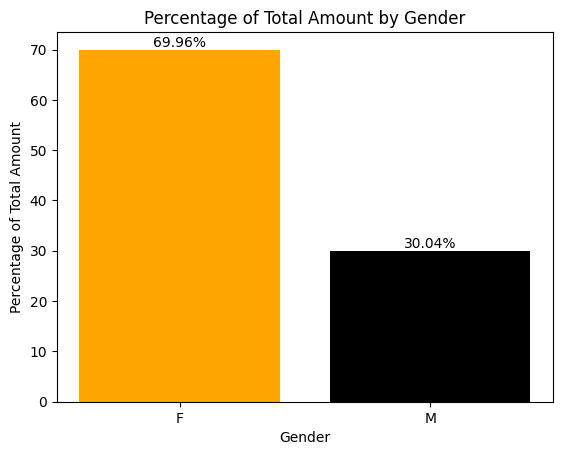

In [9]:




# Group by 'Gender' and sum the 'Amount' for each gender
gender_amount = data.groupby('Gender')['Amount'].sum()

# Calculate the total amount for percentage calculation
total_amount = gender_amount.sum()

# Calculate the percentage for each gender
gender_percentage = (gender_amount / total_amount) * 100

# Create the bar plot
bars = plt.bar(gender_percentage.index, gender_percentage.values,color = ["orange","black"])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Total Amount by Gender')

# Add data labels on top of each bar to show the percentage
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
# from above graphs we can see that most of the buyers are females and even the purchasing power of females are greater
# than men

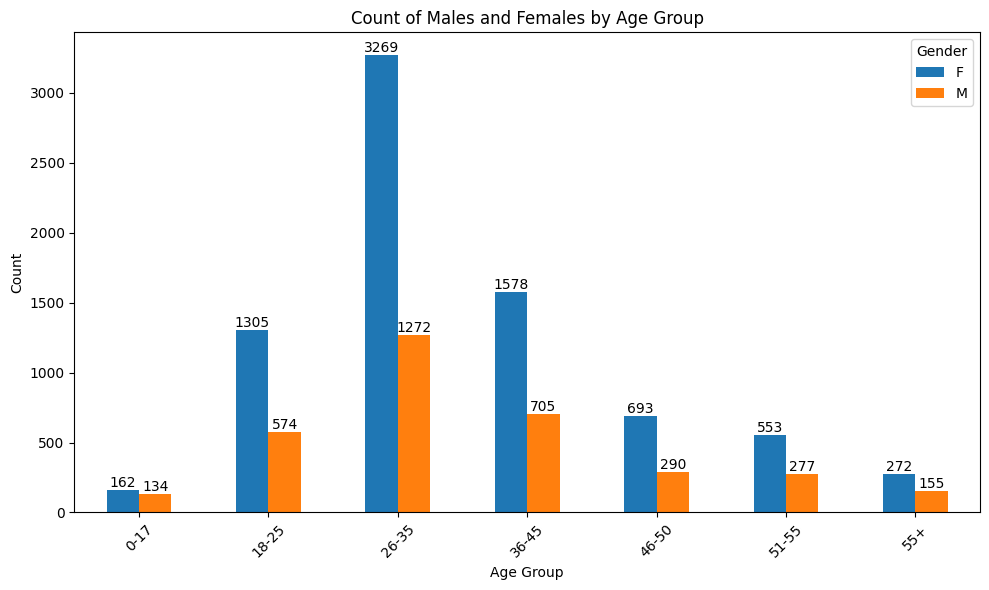

In [10]:




# Group by 'Age Group' and 'Gender', counting occurrences for each combination
age_gender_count = data.groupby(['Age Group', 'Gender']).size().unstack()

# Create the bar plot
bars = age_gender_count.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Males and Females by Age Group')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Add a legend
plt.legend(title='Gender')

# Add data labels on top of each bar to show the count
for bar in bars.containers:
    for b in bar:
        yval = b.get_height()  # Get the height of the bar
        plt.text(b.get_x() + b.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


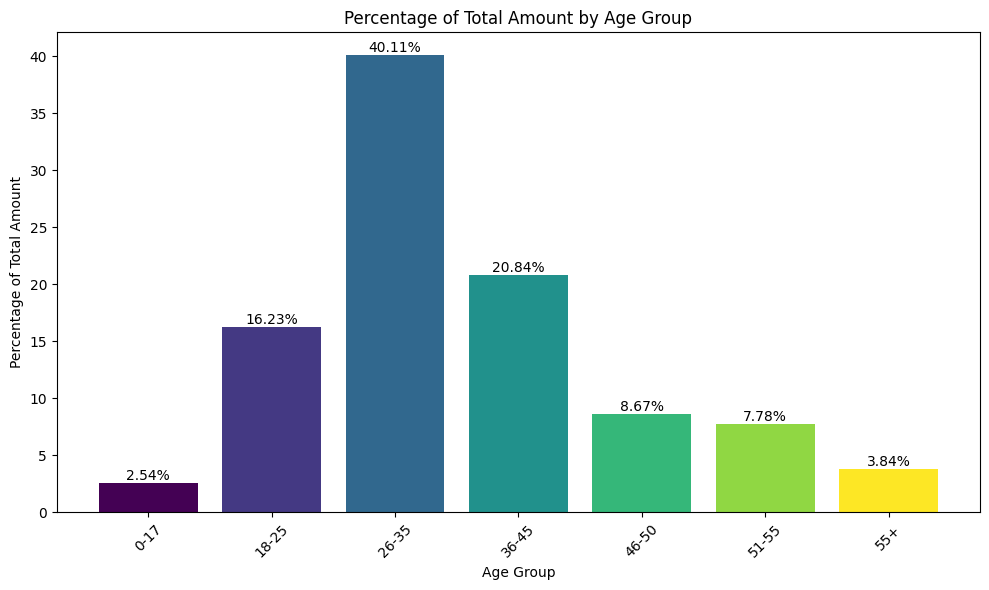

In [11]:



# Group by 'Age Group' and sum the 'Amount' for each group
age_group_amount = data.groupby('Age Group')['Amount'].sum()

# Calculate the total amount for percentage calculation
total_amount = age_group_amount.sum()

# Calculate the percentage for each age group
age_group_percentage = (age_group_amount / total_amount) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(age_group_percentage)))  # Generate a color map

bars = plt.bar(age_group_percentage.index, age_group_percentage.values, color=colors)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Total Amount by Age Group')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Add data labels on top of each bar to show the percentage
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
#from above graphs we can see that most of the buyers are of age group between 26-35 years female

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


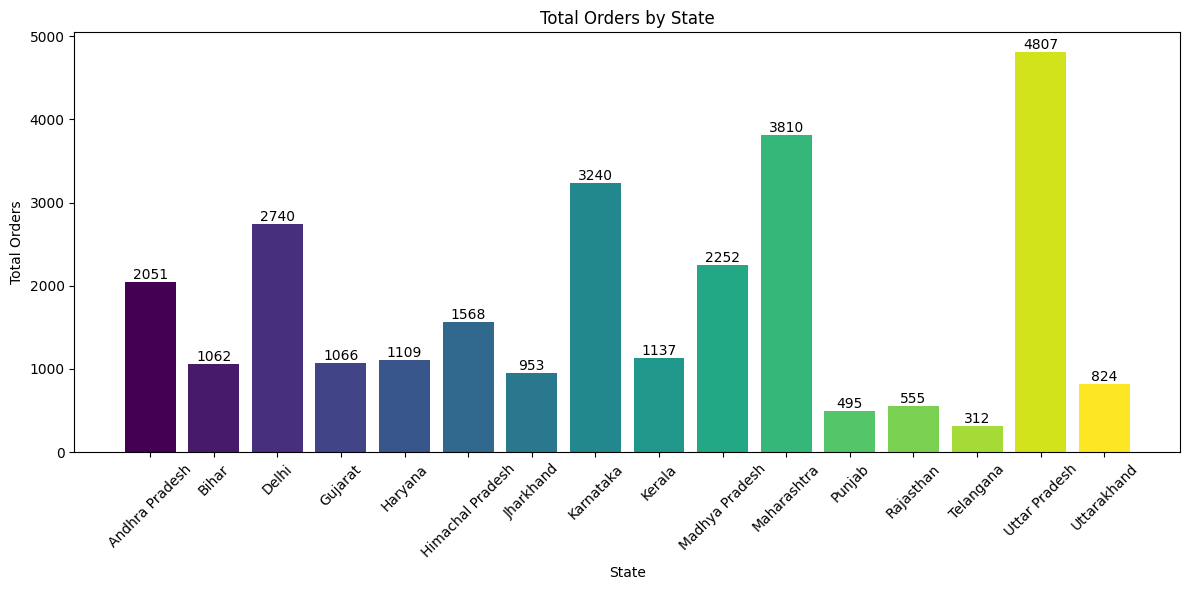

In [12]:




# Print the DataFrame columns to find the correct column name (optional)
print(data.columns)

# Group by 'State' and sum the 'Orders' for each state
state_order_sum = data.groupby('State')['Orders'].sum()

# Create the bar plot
plt.figure(figsize=(12, 6))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(state_order_sum)))

bars = plt.bar(state_order_sum.index, state_order_sum.values, color=colors)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.title('Total Orders by State')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Add data labels on top of each bar to show the total orders
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


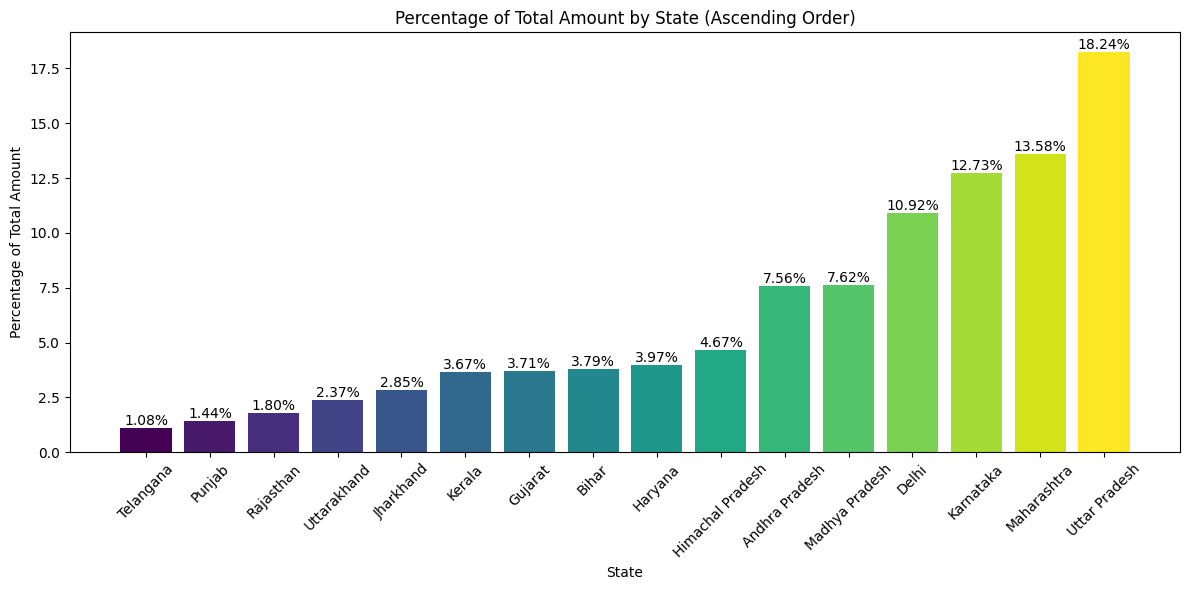

In [13]:



# Group by 'State' and sum the 'Amount' for each state
state_amount_sum = data.groupby('State')['Amount'].sum()

# Calculate the total amount for percentage calculation
total_amount = state_amount_sum.sum()

# Calculate the percentage for each state
state_percentage = (state_amount_sum / total_amount) * 100

# Sort the percentages in ascending order
state_percentage_sorted = state_percentage.sort_values()

# Create the bar plot
plt.figure(figsize=(12, 6))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(state_percentage_sorted)))

bars = plt.bar(state_percentage_sorted.index, state_percentage_sorted.values, color=colors)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Total Amount by State (Ascending Order)')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Add data labels on top of each bar to show the percentage
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
#from above graphs we can se that most of the orders  are from uttar pradesh,maharashtra,karnataka respectively.

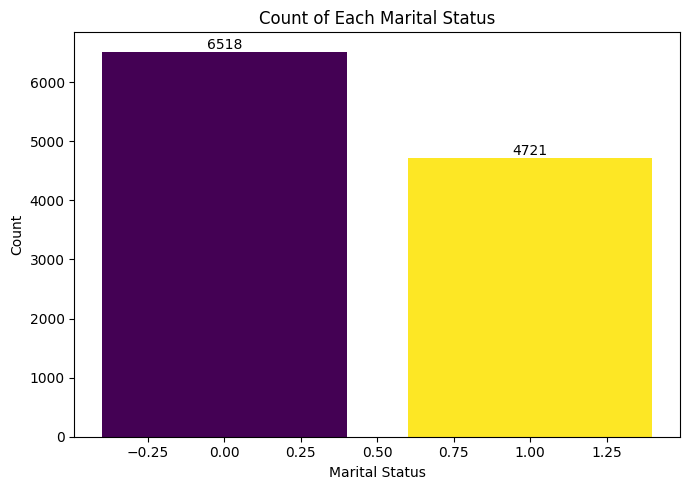

In [14]:



# Group by 'Marital_Status' and count occurrences
marital_status_count = data['Marital_Status'].value_counts()  # Use the correct name with underscore

# Create the bar plot with specified size
plt.figure(figsize=(7, 5))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(marital_status_count)))

bars = plt.bar(marital_status_count.index, marital_status_count.values, color=colors)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Each Marital Status')

# Add data labels on top of each bar to show the count
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


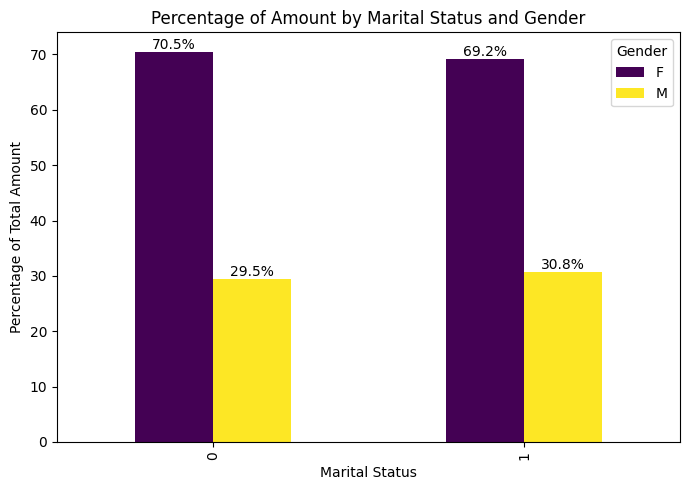

In [15]:



# Group by 'Marital_Status' and 'Gender', then sum the 'Amount'
amount_by_marital_gender = data.groupby(['Marital_Status', 'Gender'])['Amount'].sum().unstack()

# Calculate the total amount for each marital status
total_amount_by_status = amount_by_marital_gender.sum(axis=1)

# Calculate the percentage for each gender relative to the total amount for that marital status
percentage_by_marital_gender = (amount_by_marital_gender.div(total_amount_by_status, axis=0) * 100).fillna(0)

# Create the bar plot with specified size
plt.figure(figsize=(7, 5))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, percentage_by_marital_gender.shape[1]))

# Plotting the bar chart
percentage_by_marital_gender.plot(kind='bar', color=colors, ax=plt.gca())

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Amount by Marital Status and Gender')

# Add data labels on top of each bar to show the percentage amounts
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
#from above graphs we can see that most of the buyers are married(women) and they haigh purchasing power.

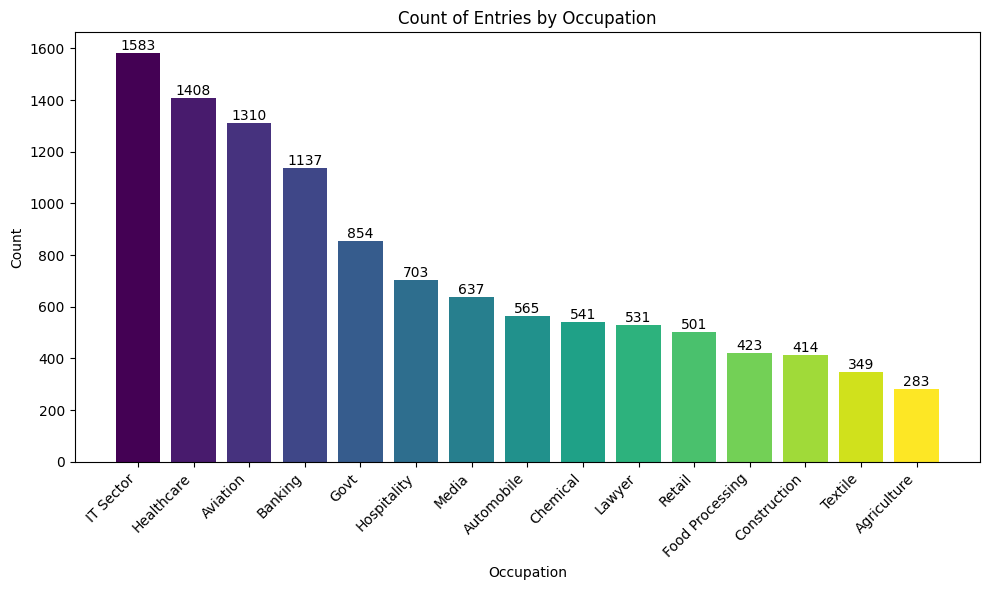

In [16]:



# Group by 'Occupation' and count occurrences
occupation_count = data['Occupation'].value_counts()

# Create the bar plot with specified size
plt.figure(figsize=(10, 6))

# Generate a color map for different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(occupation_count)))

# Plotting the bar chart
bars = plt.bar(occupation_count.index, occupation_count.values, color=colors)

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Entries by Occupation')

# Add data labels on top of each bar to show the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


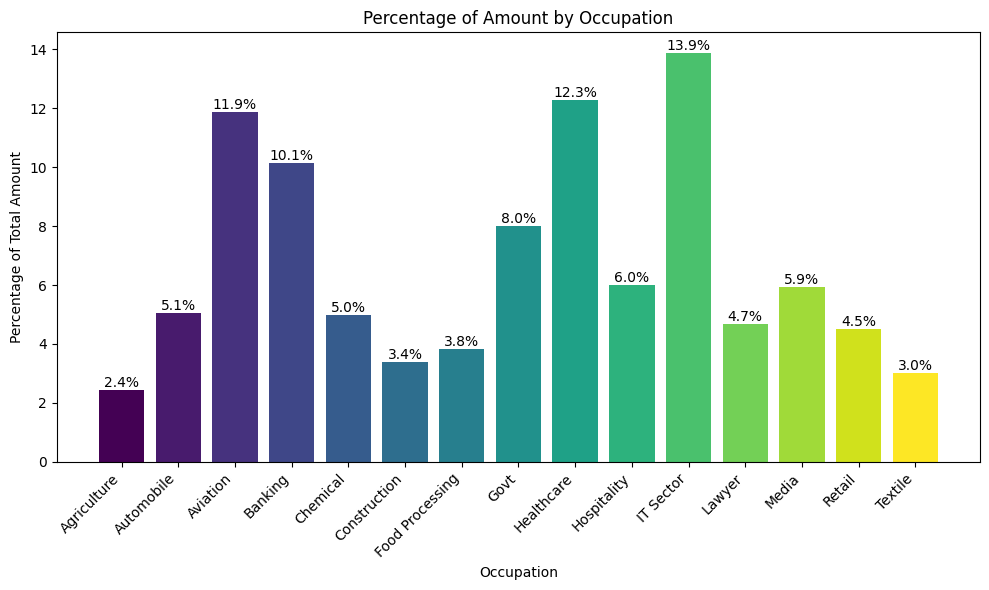

In [17]:



# Group by 'Occupation' and sum the 'Amount'
occupation_amount = data.groupby('Occupation')['Amount'].sum()

# Calculate the total amount for percentage calculation
total_amount = occupation_amount.sum()

# Calculate the percentage for each occupation
occupation_percentage = (occupation_amount / total_amount) * 100

# Create the bar plot with specified size
plt.figure(figsize=(10, 6))

# Generate a color map for different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(occupation_percentage)))

# Plotting the bar chart
bars = plt.bar(occupation_percentage.index, occupation_percentage.values, color=colors)

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Amount by Occupation')

# Add data labels on top of each bar to show the percentage amounts
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
# from above graphs we can see that most of the buyers are working in IT,Healthcare and aviation sector respectivey.

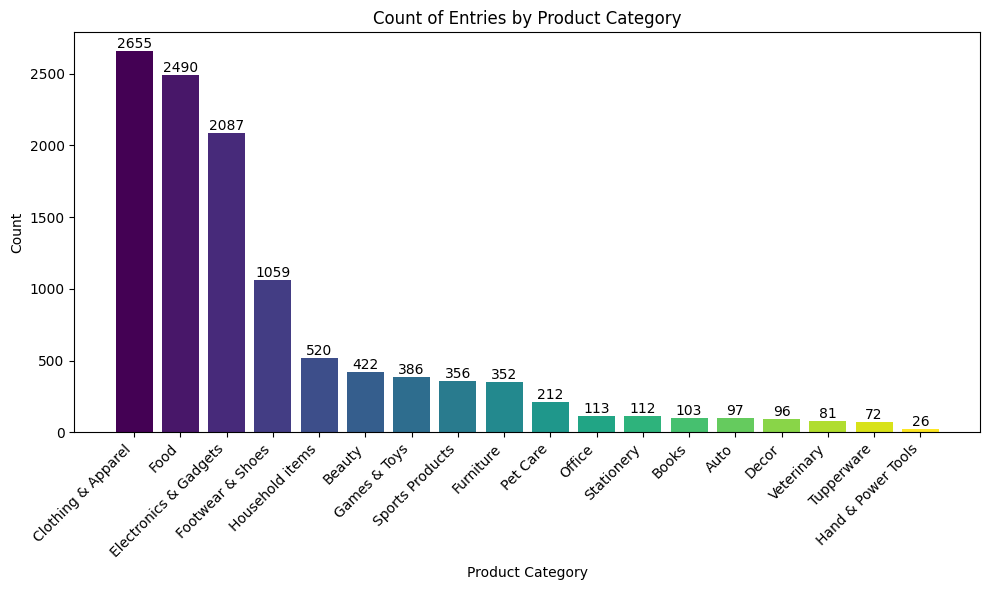

In [18]:



# Group by 'Product_Category' and count occurrences
product_category_count = data['Product_Category'].value_counts()

# Create the bar plot with specified size
plt.figure(figsize=(10, 6))

# Generate a color map for different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(product_category_count)))

# Plotting the bar chart
bars = plt.bar(product_category_count.index, product_category_count.values, color=colors)

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Entries by Product Category')

# Add data labels on top of each bar to show the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


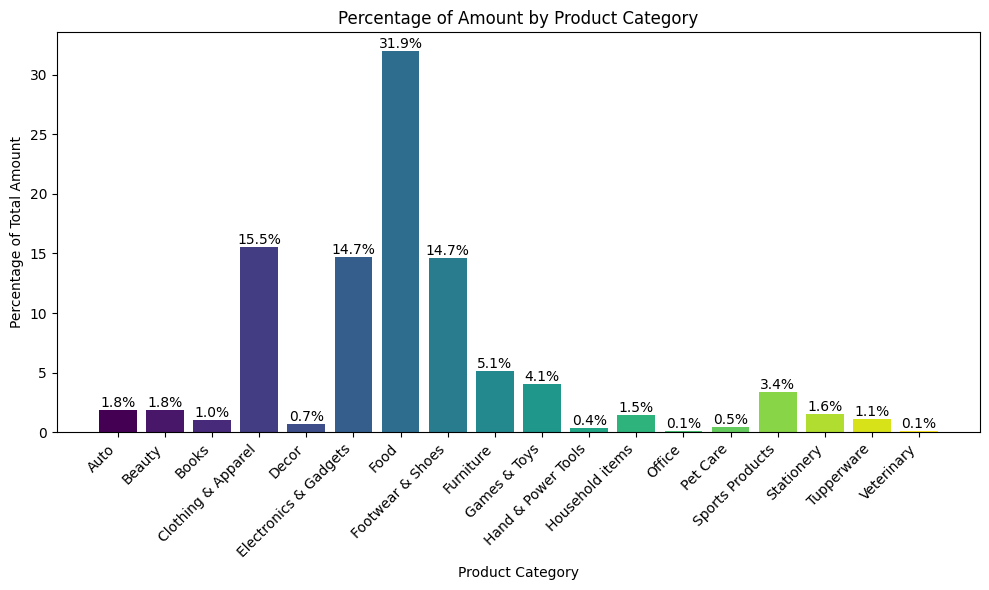

In [19]:


# Group by 'Product_Category' and sum the 'Amount'
product_category_amount = data.groupby('Product_Category')['Amount'].sum()

# Calculate the total amount for percentage calculation
total_amount = product_category_amount.sum()

# Calculate the percentage for each product category
product_category_percentage = (product_category_amount / total_amount) * 100

# Create the bar plot with specified size
plt.figure(figsize=(10, 6))

# Generate a color map for different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(product_category_percentage)))

# Plotting the bar chart
bars = plt.bar(product_category_percentage.index, product_category_percentage.values, color=colors)

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Amount by Product Category')

# Add data labels on top of each bar to show the percentage amounts
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
#from above graphs most of the sold prducts are from food,clothing & apparel and electronics gadgets

In [ ]:
#conclusion

# married women of age group 26-35 yrs are from up,maharshtra,karnataka,working in IT,Healthcare,Aviation sectors 
# are more likely  to buy products from food, clothing and electronics.